# Online Food Delivery Preferences

# (insert questions, rationale, description)

Motivation:   
We want to find how different variables will affect the satisfaction of a food delivery order  
We utilised this online food delivery dataset from Bangalore.  

  
Main Question: 
Which variable(s) can improve customer satisfaction of a food order?  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datacleaner as dc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

In [2]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")

In [3]:
foodDelivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
foodDelivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [5]:
foodDelivery.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Univariate Statistics

#### For our dataset, since there are 55 variables, we have broken down the dataset into a few smaller categories:
- Consumer Demographics
- Consumer Preferences
- Purchase Demand
- No Purchase
- Cancellation
- Delivery Time
- Overall Quality 

# Consumer Demographics Analysis

(insert description)

In [6]:
age = pd.DataFrame(foodDelivery['Age'])
familySize = pd.DataFrame(foodDelivery['Family size'])

In [7]:
age.describe()

,Age
count,388.000000
mean,24.628866
std,2.975593
min,18.000000
25%,23.000000
50%,24.000000
75%,26.000000
max,33.000000


In [9]:
familySize.describe()

,Family size
count,388.000000
mean,3.280928
std,1.351025
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,6.000000


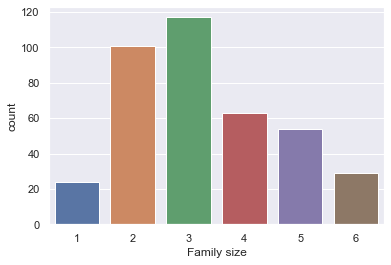

In [10]:
f = sb.countplot(x= "Family size", data = foodDelivery)

<AxesSubplot:ylabel='Count'>

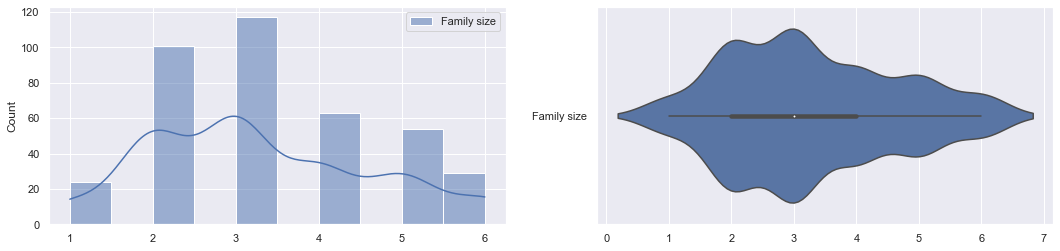

In [11]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.violinplot(data = familySize, orient = "h", ax = axes[1])
sb.histplot(data = familySize, kde = True, ax = axes[0])

<AxesSubplot:ylabel='Count'>

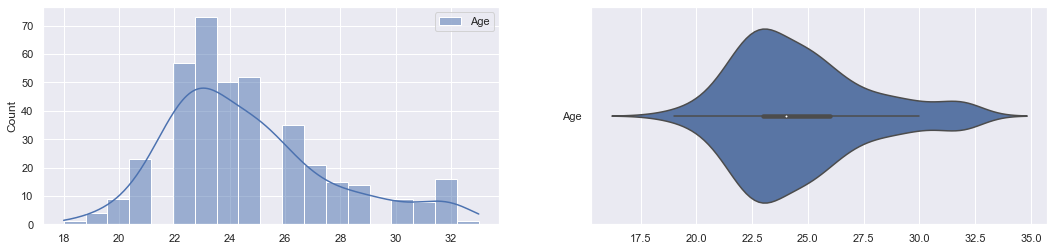

In [12]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.violinplot(data = age, orient = "h", ax = axes[1])
sb.histplot(data = age, kde = True, ax = axes[0])

Remarks:

Age is positively skewed.


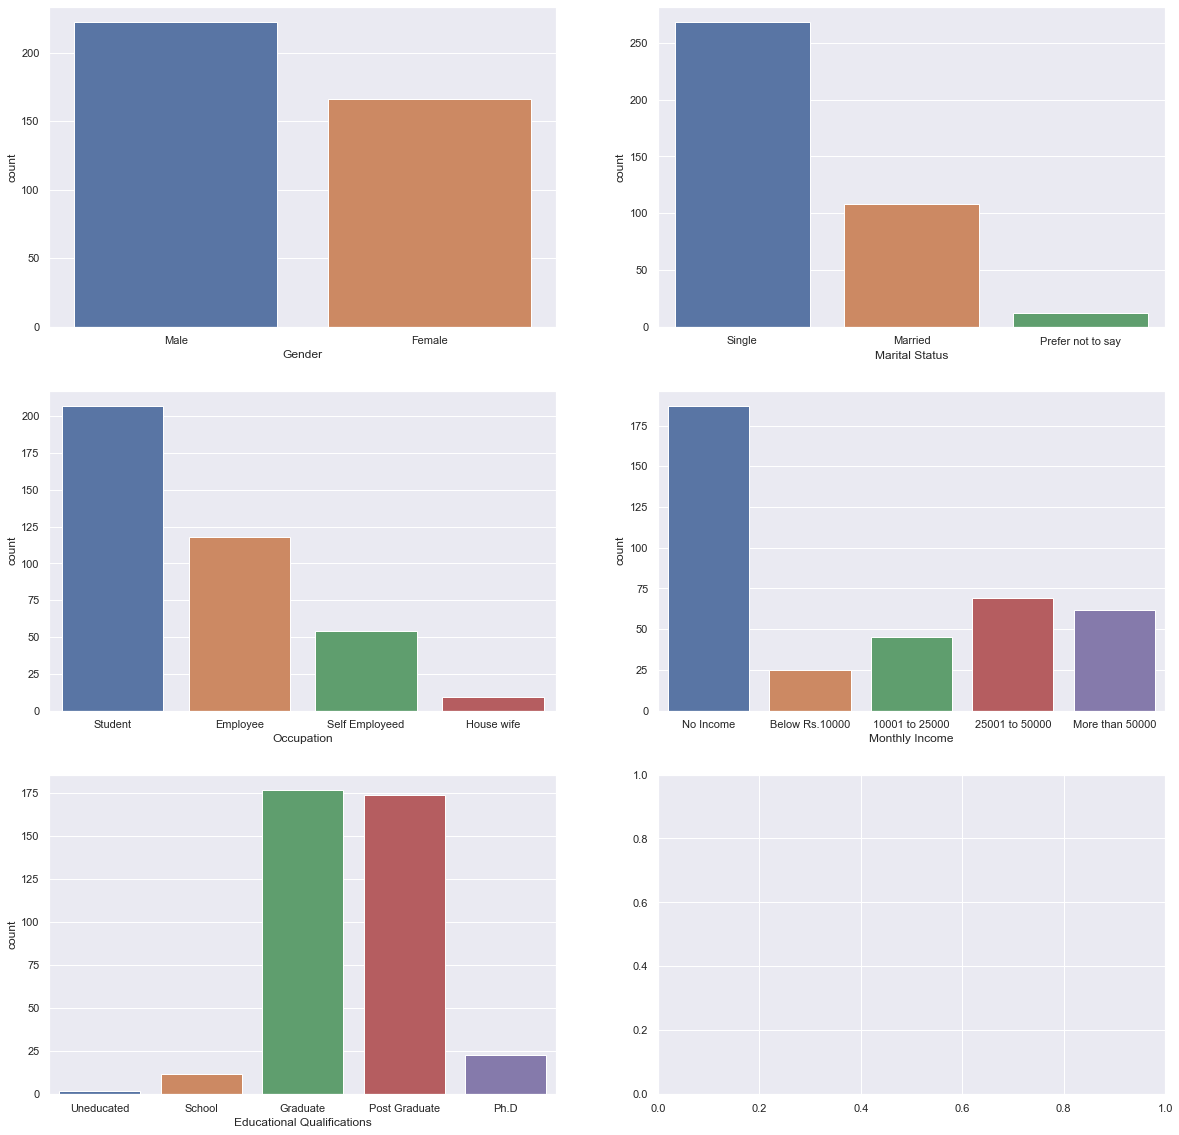

In [13]:
f, axes = plt.subplots(3, 2, figsize = (20, 20))

f = sb.countplot(x= "Gender", data = foodDelivery, ax = axes[0,0], order = ["Male", "Female"])
f = sb.countplot(x= "Marital Status", data = foodDelivery, ax = axes[0,1])
f = sb.countplot(x= "Occupation", data = foodDelivery, ax = axes[1,0])
f = sb.countplot(x= "Monthly Income", data = foodDelivery, ax = axes[1,1], order = ["No Income", "Below Rs.10000", "10001 to 25000", 
"25001 to 50000", "More than 50000"])
f = sb.countplot(x= "Educational Qualifications", data = foodDelivery, ax = axes[2,0], order = ["Uneducated", "School", "Graduate", "Post Graduate", "Ph.D"])

### Remarks:

Graduates and Post Graduates make up the majority of the consumers

Students make up the majority of consumers

As a result, the majority of consumers are those without income

# Consumer Preferences Analysis
(insert description)

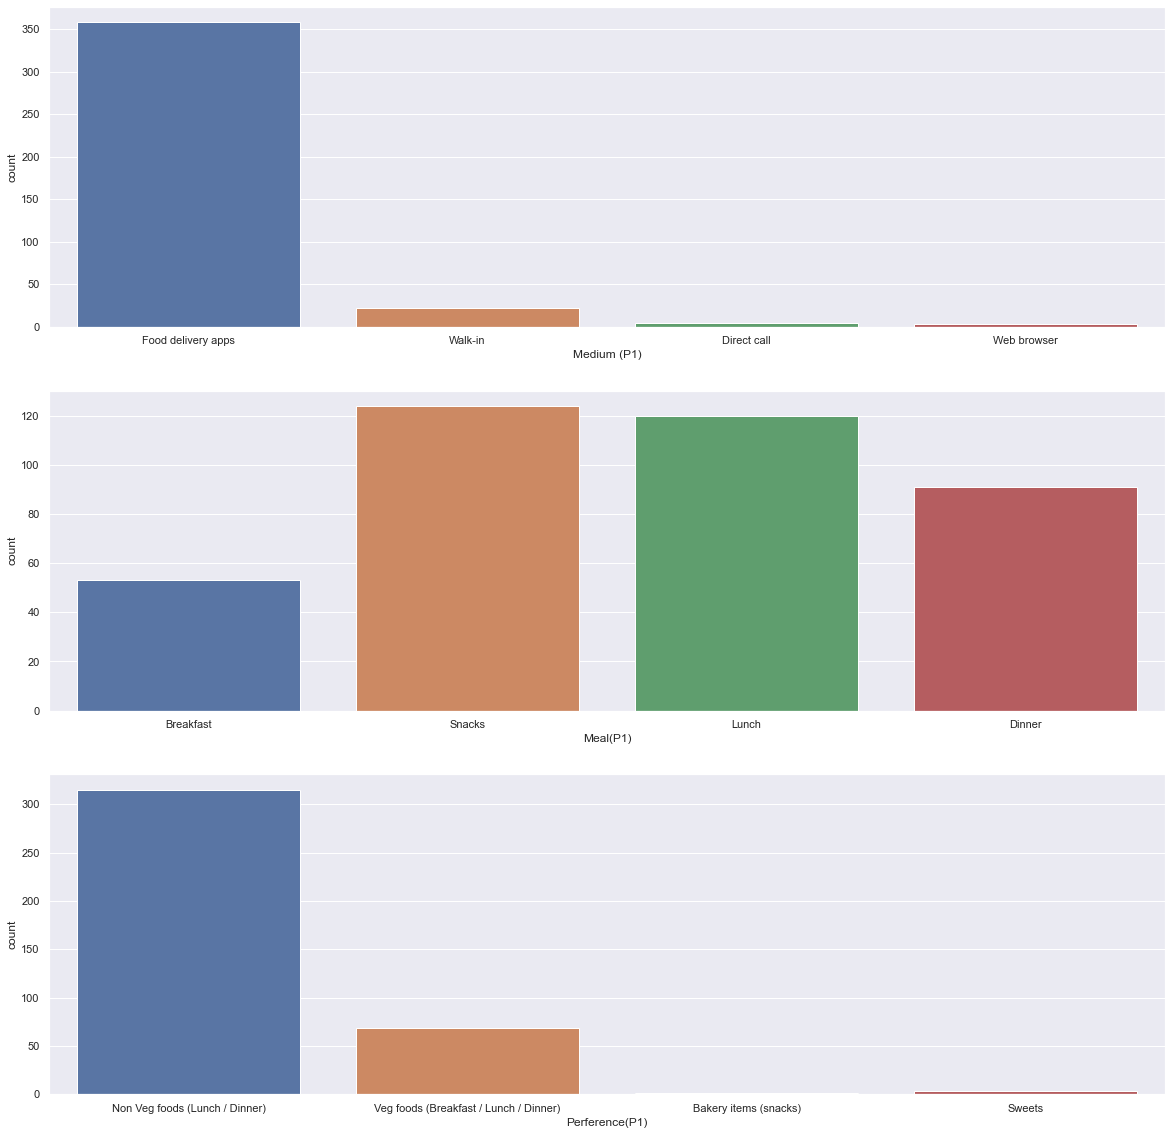

In [14]:
f, axes = plt.subplots(3, 1, figsize = (20, 20))

# f = sb.countplot(x= "Meal (P1)", data = foodDelivery, ax = axes[0,0], order = ["Male", "Female"])
# f = sb.countplot(x= "Marital Status", data = foodDelivery, ax = axes[0,1])
# f = sb.countplot(x= "Occupation", data = foodDelivery, ax = axes[1,0])
# f = sb.countplot(x= "Monthly Income", data = foodDelivery, ax = axes[1,1], order = ["No Income", "Below Rs.10000", "10001 to 25000", 
# "25001 to 50000", "More than 50000"])
# f = sb.countplot(x= "Educational Qualifications", data = foodDelivery, ax = axes[2,0], order = ["Uneducated", "School", "Graduate", "Post Graduate", "Ph.D"])

f = sb.countplot(x= "Medium (P1)", data = foodDelivery, ax = axes[0])
f = sb.countplot(x= "Meal(P1)", data = foodDelivery, ax= axes[1])
f = sb.countplot(x= "Perference(P1)", data = foodDelivery, ax= axes[2])
 

# (INSERT REMARKS/ANALYSIS) ^

# Purchase Demand Analysis
(insert description)

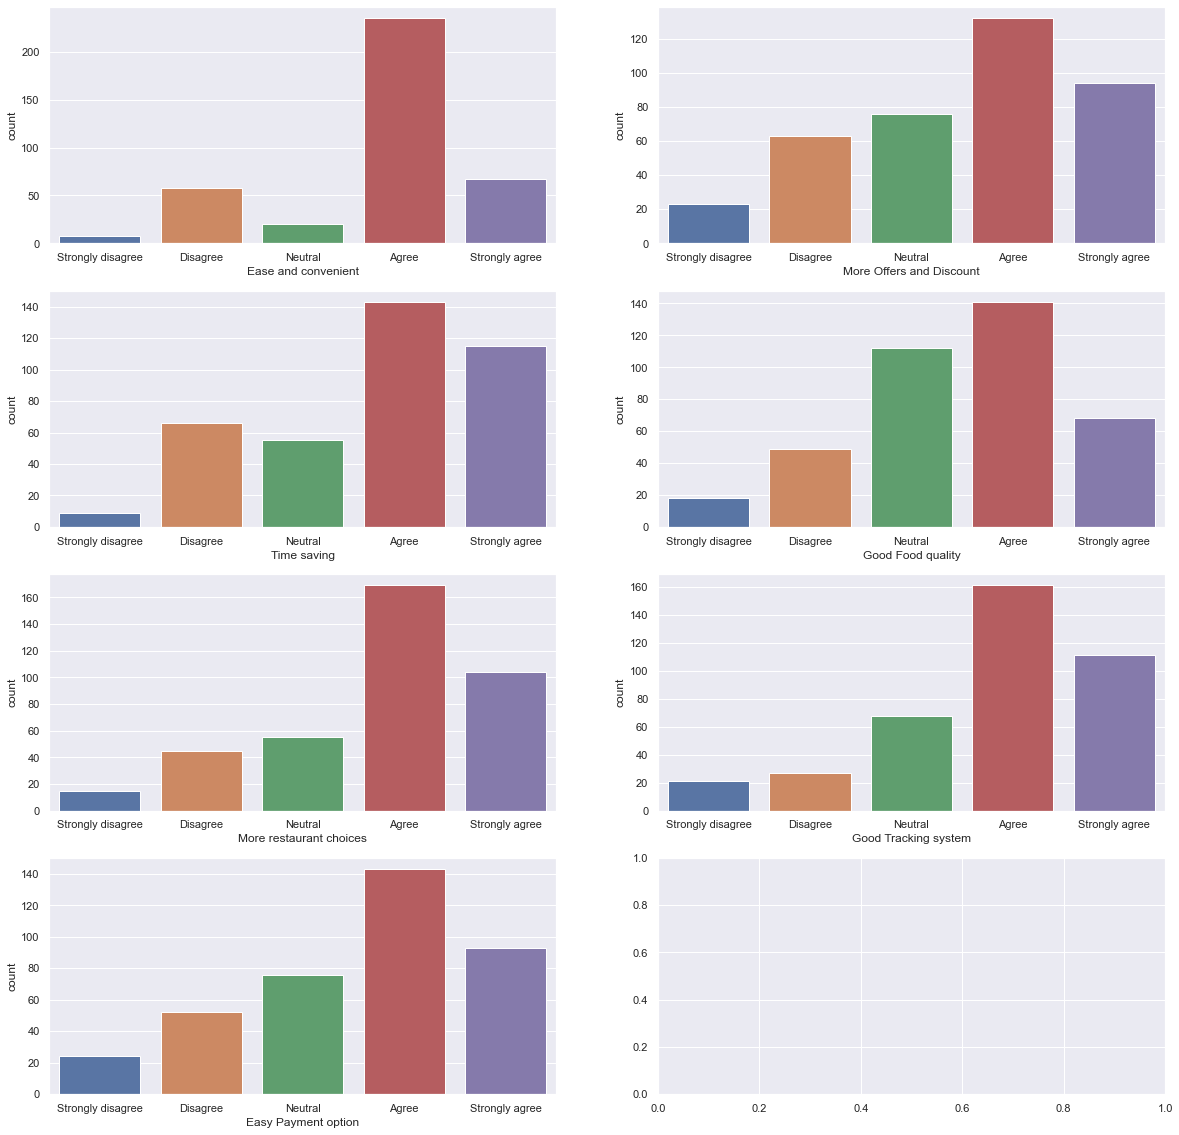

In [15]:
f, axes = plt.subplots(4, 2, figsize = (20, 20))

f = sb.countplot(x= "Ease and convenient", data = foodDelivery, ax = axes[0,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Time saving", data = foodDelivery, ax= axes[1,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "More restaurant choices", data = foodDelivery, ax= axes[2,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Easy Payment option", data = foodDelivery, ax = axes[3,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "More Offers and Discount", data = foodDelivery, ax= axes[0,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Good Food quality", data = foodDelivery, ax= axes[1,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Good Tracking system", data = foodDelivery, ax= axes[2,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])

# (INSERT REMARKS/ANALYSIS) ^

# No Purchase Analysis
(insert description)

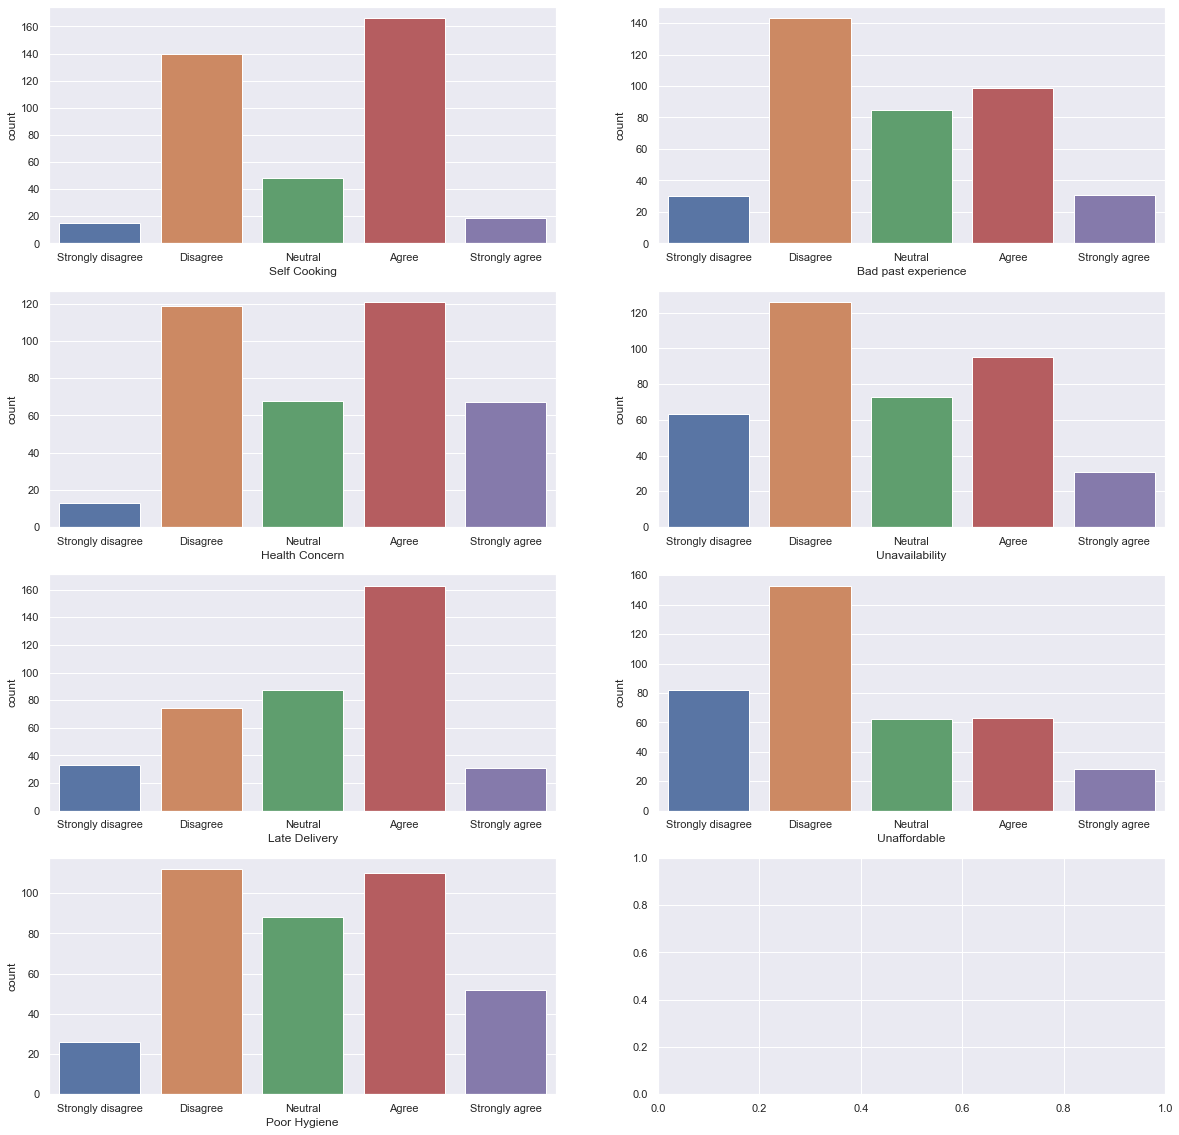

In [16]:
f, axes = plt.subplots(4, 2, figsize = (20, 20))

f = sb.countplot(x= "Self Cooking", data = foodDelivery, ax = axes[0,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Health Concern", data = foodDelivery, ax= axes[1,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Late Delivery", data = foodDelivery, ax= axes[2,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Poor Hygiene", data = foodDelivery, ax = axes[3,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Bad past experience", data = foodDelivery, ax= axes[0,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Unavailability", data = foodDelivery, ax= axes[1,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Unaffordable", data = foodDelivery, ax= axes[2,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])

# (INSERT REMARKS/ANALYSIS) ^

# Cancellation Analysis
(insert description)

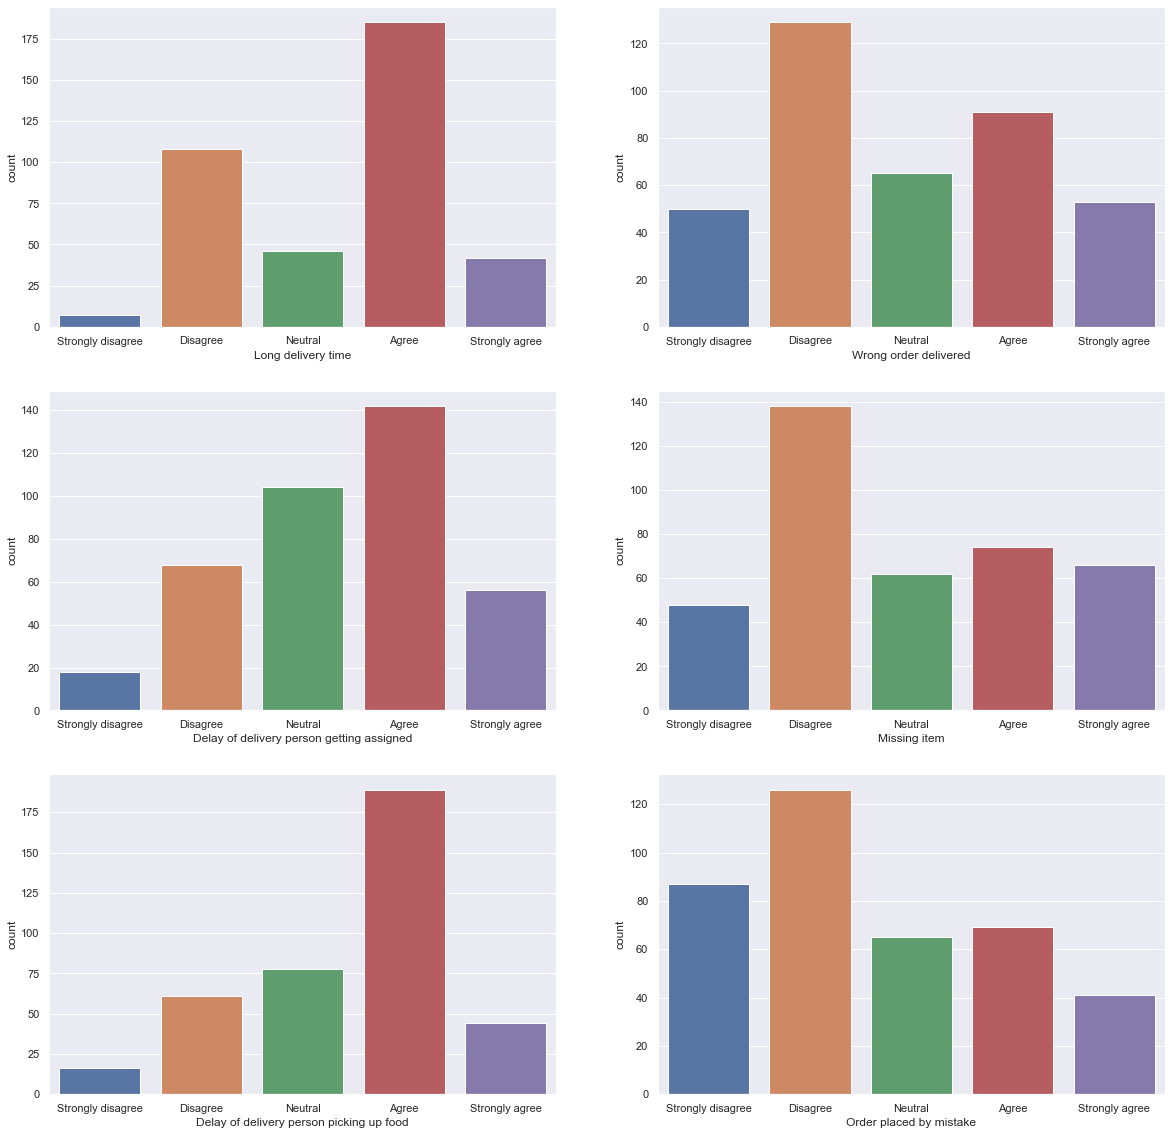

In [17]:
f, axes = plt.subplots(3, 2, figsize = (20, 20))

f = sb.countplot(x= "Long delivery time", data = foodDelivery, ax = axes[0,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Delay of delivery person getting assigned", data = foodDelivery, ax= axes[1,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Delay of delivery person picking up food", data = foodDelivery, ax= axes[2,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Wrong order delivered", data = foodDelivery, ax = axes[0,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Missing item", data = foodDelivery, ax= axes[1,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])
f = sb.countplot(x= "Order placed by mistake", data = foodDelivery, ax= axes[2,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly agree"])

# (INSERT REMARKS/ANALYSIS) ^

# Time Factor during Delivery Analysis
(insert description)

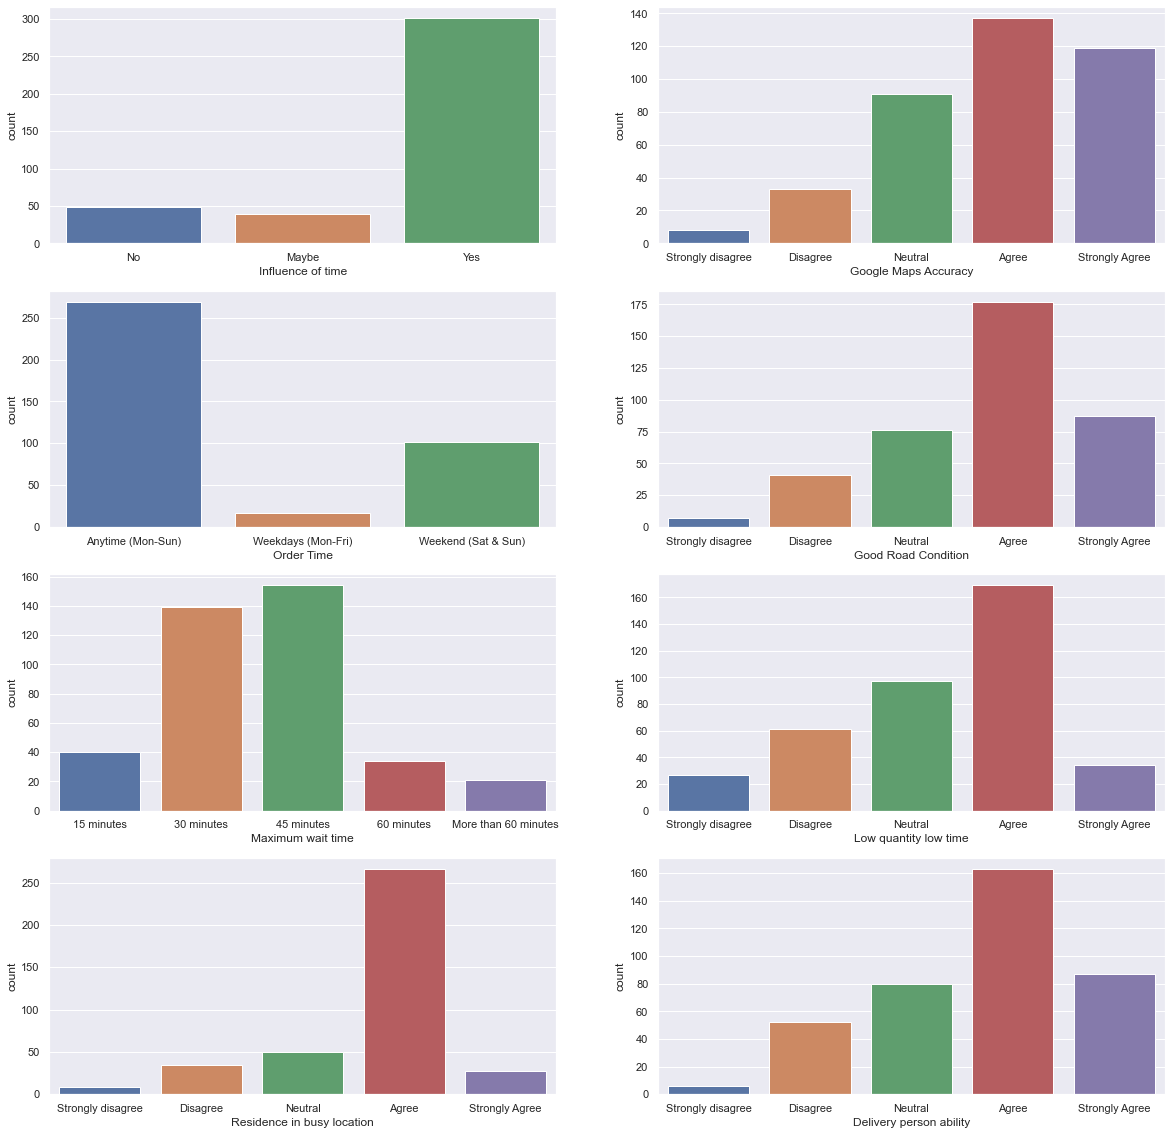

In [18]:
f, axes = plt.subplots(4, 2, figsize = (20, 20))

f = sb.countplot(x= "Influence of time", data = foodDelivery, ax = axes[0,0], order = ["No", "Maybe", "Yes"])
f = sb.countplot(x= "Order Time", data = foodDelivery, ax= axes[1,0], order = ["Anytime (Mon-Sun)", "Weekdays (Mon-Fri)", "Weekend (Sat & Sun)"])
f = sb.countplot(x= "Maximum wait time", data = foodDelivery, ax= axes[2,0], order = ["15 minutes", "30 minutes", "45 minutes", "60 minutes", "More than 60 minutes"])
f = sb.countplot(x= "Residence in busy location", data = foodDelivery, ax = axes[3,0], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])
f = sb.countplot(x= "Google Maps Accuracy", data = foodDelivery, ax= axes[0,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])
f = sb.countplot(x= "Good Road Condition", data = foodDelivery, ax= axes[1,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])
f = sb.countplot(x= "Low quantity low time", data = foodDelivery, ax= axes[2,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])
f = sb.countplot(x= "Delivery person ability", data = foodDelivery, ax= axes[3,1], order = ["Strongly disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])

# (INSERT REMARKS/ANALYSIS) ^

# Restaurant Quality Analysis
(insert description)

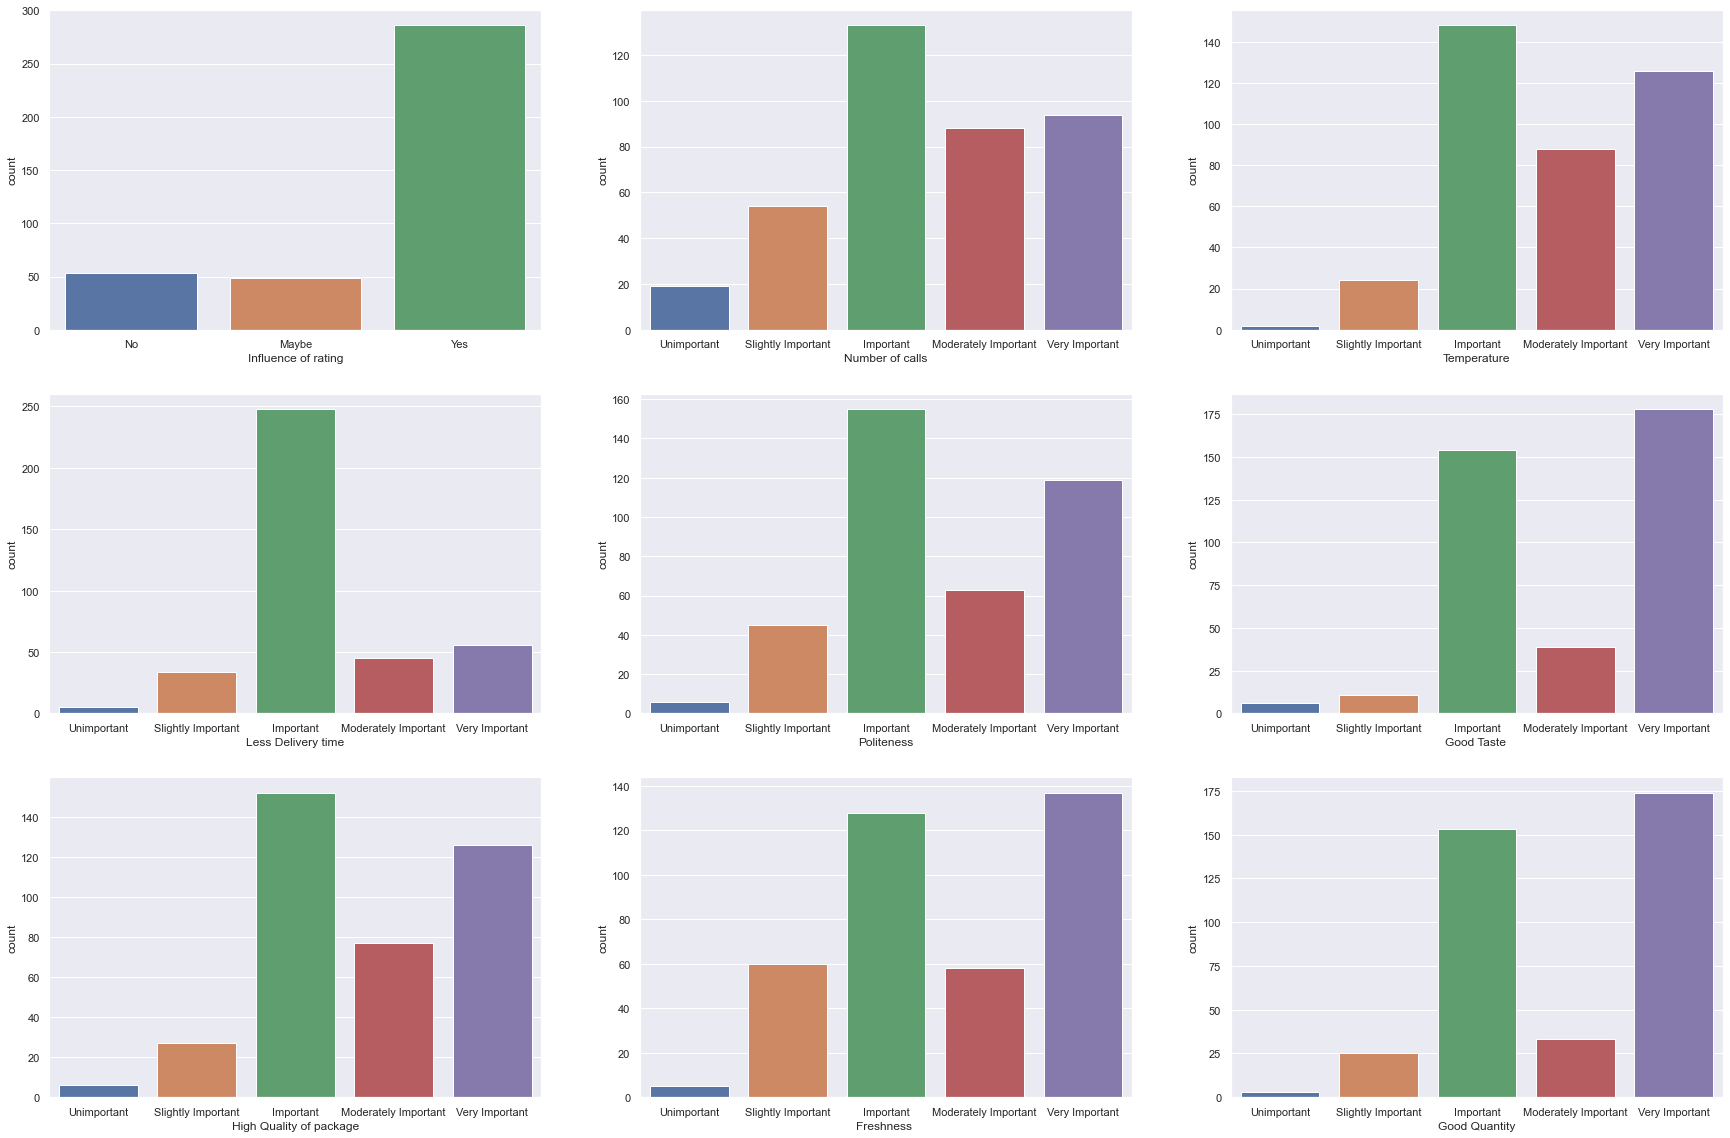

In [25]:
f, axes = plt.subplots(3, 3, figsize = (30, 20))

f = sb.countplot(x= "Influence of rating", data = foodDelivery, ax = axes[0,0], order = ["No", "Maybe", "Yes"])
f = sb.countplot(x= "Less Delivery time", data = foodDelivery, ax= axes[1,0], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "High Quality of package", data = foodDelivery, ax= axes[2,0], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Number of calls", data = foodDelivery, ax = axes[0,1], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Politeness", data = foodDelivery, ax= axes[1,1], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Freshness ", data = foodDelivery, ax= axes[2,1], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Temperature", data = foodDelivery, ax= axes[0,2], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Good Taste ", data = foodDelivery, ax= axes[1,2], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])
f = sb.countplot(x= "Good Quantity", data = foodDelivery, ax= axes[2,2], order = ["Unimportant", "Slightly Important" , "Important", "Moderately Important", "Very Important"])

# (INSERT REMARKS/ANALYSIS) ^

In [8]:
reviews = pd.DataFrame(foodDelivery['Reviews']) # x
satisfaction = pd.DataFrame(foodDelivery['Output']) # y

In [7]:
# !!! This will edit the dataset
# Datacleaner is an open-source library used for automating data cleaning, 
# built on Pandas Dataframe and Sklearn preprocessing features
dc.autoclean(foodDelivery).head(None)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,...,0,0,0,0,0,0,0,0,1,135
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,...,1,4,1,1,1,1,4,4,1,135
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,...,0,4,0,0,4,4,4,4,1,135
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,...,0,4,0,4,4,0,4,4,1,116


In [6]:
# Data Cleaning Reviews: Remove punctuations and convert all to lowercase alphabets for converting into matrix of words
# reviews will be a dataframe of 2 columns, index and Reviews, containing cleaned sentences
def clean_dataset(dataset):
    for i in range(reviews.shape[0]):
        newstring = ""
        for char in reviews.iloc[i][0]:
            if char.isalpha() or char == " ":
                newstring += char.lower()
        reviews.iloc[i][0] = newstring

Since our models cannot use text to train and test, we need to convert text into either numbers or arrays    
To convert text into numbers, we can simply use datasets of positive words or negative words to +1 or -1 to a sentiment count respectively (Does Sentiment Analysis based on connatation of word)   
To convert text into arrays, Sklearn provides a few ways:
>One-hot Encoding, this is used more on categorical variables, not suitable for text data  
>Bag of Words, converting the Reviews data into array of numbers that correspond to each word

Sklearn provides 3 ways to do this, CountVectorizer, TfidfVectorizer, and HashingVectorizer (Does Sentiment Analysis based on rareness of words)    
>CountVectorizer simply tokenizes existing words into an array.
>TfidfVectorizer (Term-Frequency Inverse-Document-Frequency) builts on CountVectorizer by calculating word frequencies.
>HashingVectorizer builts on TfidfVectorizer by hashing the words instead. This is useful for very large sets of words.  

We will be using TfidfVectorizer since it has a higher accuracy than CountVectorizer and our dataset is not that large 

TfidfVectorizer will calculate the Term Frequency(Number of times a word appears in a sentence) and Inverse Document Frequency (How rare or common a word is in a sentence) to derive TF-IDF  
Term Frequency tf(t, d) = (Number of times term t appears in a document) / (Total number of terms in the document)  
Inverse Document Frequency idf(t) = log ( Number of sentences / df(t) ) + 1   
TF-IDF(t, d) = tf(t, d) * idf(t)  

In [20]:
review_x = reviews['Reviews'] # extract the column of sentences, throwing away the index
satisfaction_y = satisfaction['Output'] # extract the column of "Output", throwing away the index
tfidf = TfidfVectorizer(max_features = 1000, stop_words = "english", use_idf = True) # can limit the maximum number of words tracked and exclude stopwords (common, non-sentimental words)
review_x = tfidf.fit_transform(review_x) # transform the column into sparse arrays and calculate TFIDF
#review_x = review_x.toarray()
reviews_x_train, reviews_x_test, satisfaction_y_train, satisfaction_y_test = train_test_split(review_x, satisfaction_y, test_size = 0.2, random_state = 0)

In [29]:
review_x[0].get_params()

AttributeError: 'numpy.ndarray' object has no attribute 'get_params'

[Text(669.6, 1087.2, 'X[186] <= 0.102\ngini = 0.346\nsamples = 310\nvalue = [69, 241]\nclass = Yes'),
 Text(334.8, 652.32, 'X[16] <= 0.387\ngini = 0.3\nsamples = 294\nvalue = [54, 240]\nclass = Yes'),
 Text(167.4, 217.44000000000005, 'gini = 0.27\nsamples = 286\nvalue = [46, 240]\nclass = Yes'),
 Text(502.20000000000005, 217.44000000000005, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = No'),
 Text(1004.4000000000001, 652.32, 'X[17] <= 0.272\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = No'),
 Text(837.0, 217.44000000000005, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = No'),
 Text(1171.8, 217.44000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

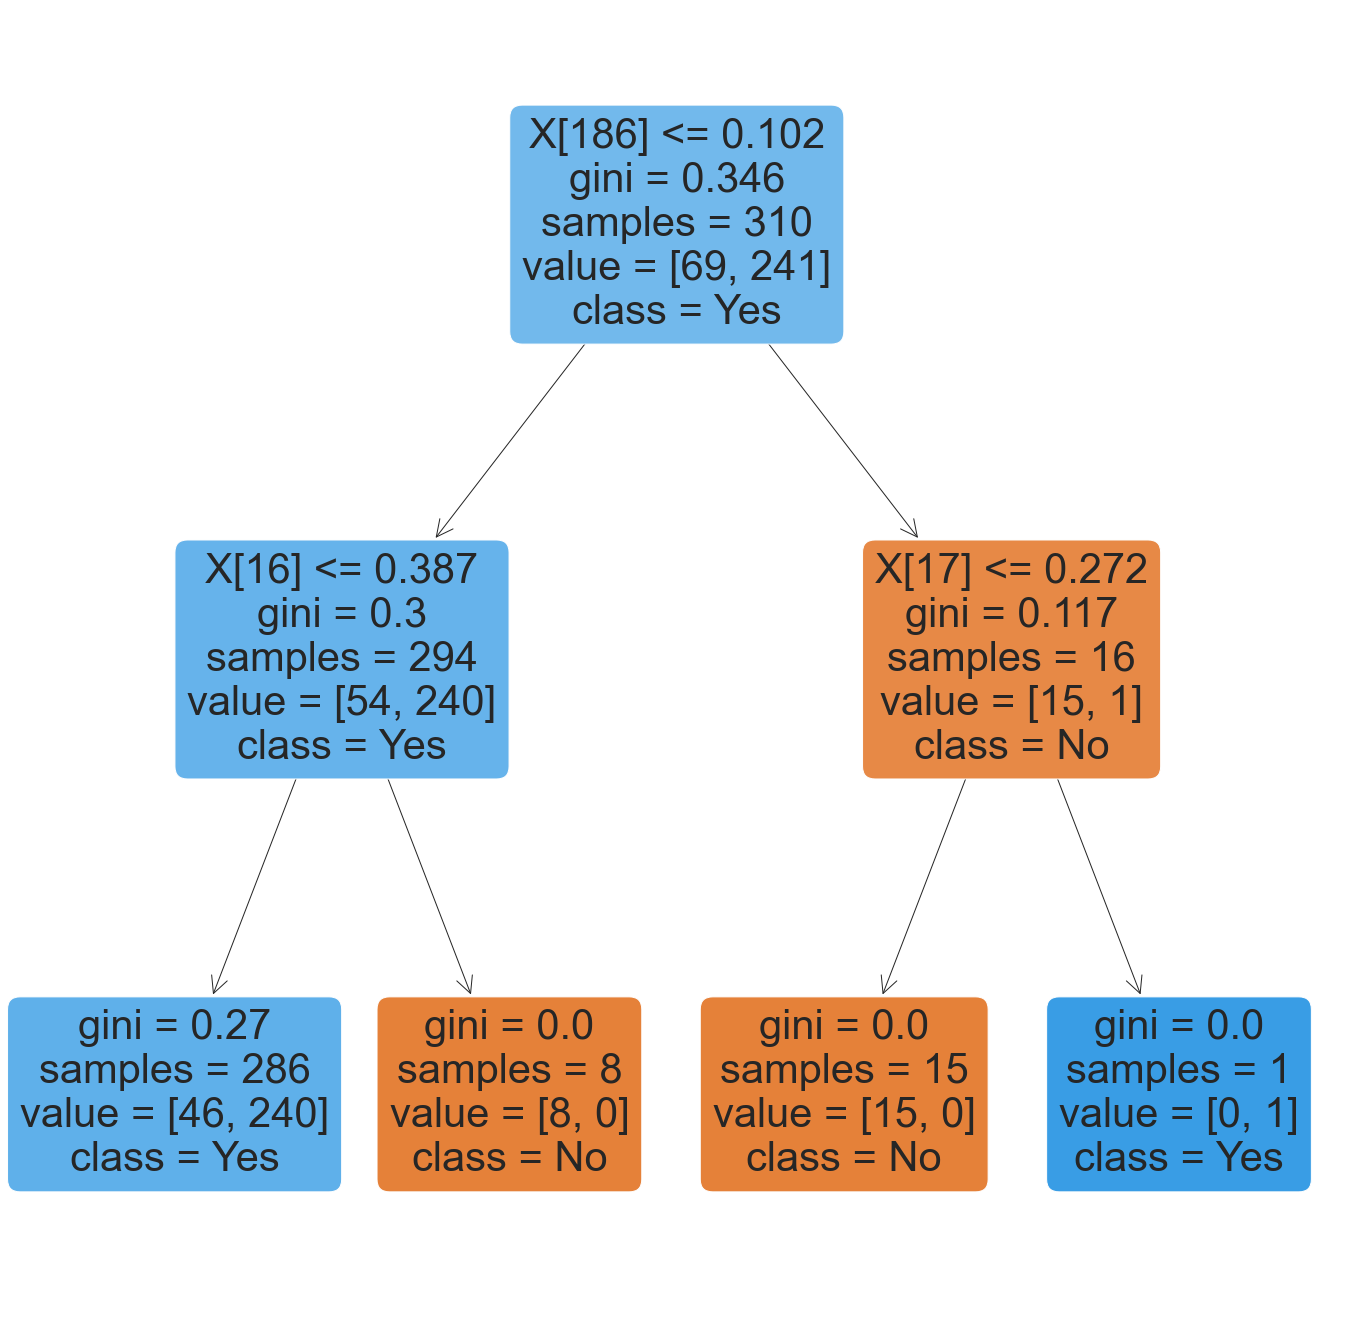

In [12]:
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(reviews_x_train, satisfaction_y_train)
f = plt.figure(figsize=(24,24))
plot_tree(tree, filled=True, rounded=True, class_names = ["No", "Yes"])